In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import decomposition
from sklearn import cluster
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib as mpl
import matplotlib.pyplot as plt
import urllib.request as request
import io
from sklearn.metrics import confusion_matrix
import matplotlib.image as mpimg
%matplotlib inline

# Análise de Componentes Principais

Seja $X_{n \times m}$ um conjunto de $n$ dados com dimensão $m$.


O vetor médio do conjunto $X$ é um vetor de $m$ componentes que são dadas por:
\begin{equation}
\bar{X}_i = \frac{1}{n}\sum_{k=1}^n X_{k, i}
\end{equation}

A *matriz de covariância* do conjunto de dados $X$ é dada por:

\begin{equation}
\mbox{cov}\left[X, X\right]_{i,j} = \frac{1}{n}\sum_{k=1}^n (X_{k,i}-\bar{X_i})(X_{k,j}-\bar{X_j})
\end{equation}

Em particular, o *traço* desta matriz, ou seja, a soma dos componentes de sua diagonal principal, é o valor médio da distância ao quadrado dos pontos em $X$ ao ponto médio.

Nota-se que esta é uma matriz simétrica e positiva semi-definida.

A dimensão $m$ é frequentemente *redundante*, ou seja, seria possível descrever um ponto do conjunto por uma quantidade menor de parâmetros.

Suponha uma transformação linear $W_{l \times m}$ com $l<m$ que transforma um ponto no espaço de dimensão $m$ para um ponto no espaço de dimensão $l$. Os pontos se transformam com $Y_i = W (X_i - \bar{X})$.

É razoável supor que a transformação que captura o *máximo* de informação sobre $X_{n \times m}$ é a que produz o conjunto de dados $Y_{n \times l}$ com *máxima* covariância em suas colunas.

Tal transformação pode ser obtida pelos primeiros $l$ componentes (ordenados em ordem decrescente de autovalores) da *decomposição espectral* da matriz $\mbox{cov}\left[X, X\right]$.

De fato, pelo teorema espectral, toda matriz real simétrica positiva $m\times m$ tem $m$ autovalores positivos e todos os seus autovetores são ortogonais.

A matriz $W$ é assim formada pelos primeiros $l$ componentes de tal decomposição.

Deste modo, é possível reduzir um vetor com $m$ componentes para um vetor com $l$ componentes retendo-se o *máximo* de informação.





## Exercício 1: PCA com valores sintéticos**

É gerada uma nuvem de pontos $x,y$ a partir da distribuição multinormal centrada em (2,1) com matriz de covariância
\begin{equation}
\begin{bmatrix}6 & 5\\
5 & 6\end{bmatrix}
\end{equation}



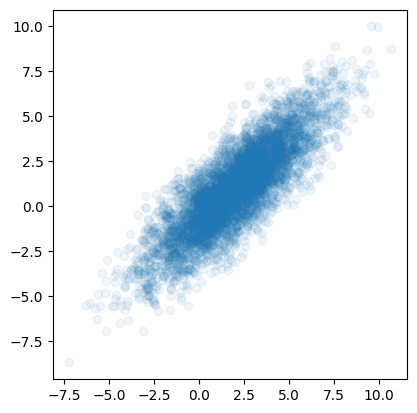

In [ ]:
plt.axes().set_aspect('equal')
data = np.random.multivariate_normal([2,1], [[6,5],[5,6]], 5000)
plt.scatter(data[:,0], data[:,1], alpha=0.0675)

A matriz de covariância claramente tem autovalores distintos.
De fato, seus autovalores são 11 e 1, correspondentes aos autovetores $(1,1)$ e $(1,-1)$.

Observa-se que os pontos estão próximos da reta paralela ao vetor correspondente ao *maior* autovalor e que passa por $(2,1)$, ou seja, $y=x-1$.

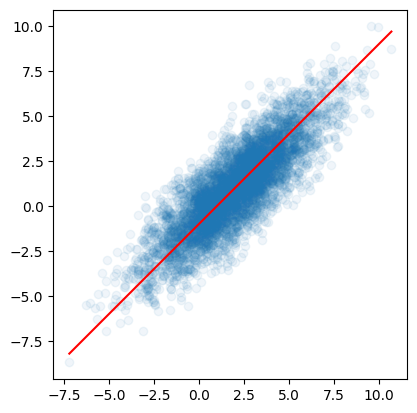

In [ ]:
plt.axes().set_aspect('equal')
x_line = np.linspace(data[:,0].min(), data[:,0].max(),2)
y_line  = x_line -1
plt.scatter(data[:,0], data[:,1], alpha=0.0675)
plt.plot(x_line, y_line, color='r')

### a) Estatísticas da população.

Calcule o ponto médio e a matriz de covariância do conjunto de dados em ```data```. Compare com o ponto médio e a matriz de covariância do enunciado.

Calcule o traço desta matriz.

*Sugestão*: Você pode calcular a matriz usando a definição acima. Note que a biblioteca ```numpy``` possui a função ```cov``` que calcula matrizes de covariância de uma população quando os pontos estão organizados em *colunas* (não é o caso de ```data```!). Para tanto, passe o parâmetro ```bias=True``` (O padrão ```False``` estima a covariância de uma amostra).

In [ ]:
# Complete com seu código
ponto_medio = np.mean(data, axis = 0)
matriz_cov = np.cov(data, bias=True, rowvar=False)
traco_matriz = np.trace(matriz_cov)

print(f"O ponto médio da nuvem de dados gerados é: {ponto_medio}")
print(f"A Matriz de covariância é: \n{matriz_cov}")
print(f"O Traço da Matriz de Covariância é: {traco_matriz}")
print("Os valores são muito próximos dos utilizados nos parâmetros para a geração dos dados")

O ponto médio da nuvem de dados gerados é: [1.99557911 0.9944125 ]
A Matriz de covariância é: 
[[5.86551383 4.90477731]
 [4.90477731 5.90716359]]
O Traço da Matriz de Covariância é: 11.772677420347602
Os valores são muito próximos dos utilizados nos parâmetros para a geração dos dados


### b) Análise de componentes principais
O objeto ```PCA``` da biblioteca ```sklearn``` faz a decomposição em componentes principais de uma amostra.

O seu construtor tem a sintaxe ```decomposition.PCA()```.
O parâmetro opcional ```n_components``` especifica a quantidade de componentes a ser obtida na decomposição.
Se omitido, ele retorna o mínimo entre a quantidade de pontos da amostra e a dimensão da amostra.

Um conjunto de dados pode ser decomposto com o método ```fit(dados)``` onde ```dados``` é uma matriz cujas linhas são pontos do espaço amostral.

O objeto retornado possui os atributos ```mean_``` com o ponto médio, ```components_``` com uma matriz cujas linhas são os autovetores da matriz de covariância e ```explained_variance_``` que corresponde aos autovalores da matriz de covariância dos dados.

Obtenha a decomposiçào em componentes principais do conjunto de dados ```data``` com dimensão 2.
Note que neste caso é desnecessário passar o parâmetro ```n_components```.

Compare o ponto médio com o obtido no item a).
Compare a *soma* dos valores de ```explained_variance_``` com o traço da matriz obtida em a).
Finalmente, compare os autovetores e autovalores com os do enunciado.

In [ ]:
# Complete com seu código
PCA = decomposition.PCA()
PCA.fit(data)

ponto_medio_pca = PCA.mean_
autovetores_mat_cov = PCA.components_
autovalores_mat_cov = PCA.explained_variance_

print(f"""Ponto médio encontrado através do PCA: {ponto_medio_pca} x
Ponto Médio calculado do conjunto de dados {ponto_medio} indicando que o ponto
médio se manteve no mesmo lugar após a aplicação do PCA.""")
print('\n')
print(f"""Soma dos autovalores do PCA {autovalores_mat_cov.sum()} x
Traço calculado da matriz de covariância {traco_matriz}, os valores são muito
próximos, o que confirma que a decomposição feita pelo PCA faz sentido.""")
print('\n')
print(f"""Os Autovetores  {autovetores_mat_cov} são diferentes em relação aos do
enunciado, devido à normalização feita pelo PCA para que a norma dos autovetores
seja 1. Já os Autovalores {autovalores_mat_cov} são muito próximos aos do enunciado.""")


Ponto médio encontrado através do PCA: [1.99557911 0.9944125 ] x 
Ponto Médio calculado do conjunto de dados [1.99557911 0.9944125 ] indicando que o ponto
médio se manteve no mesmo lugar após a aplicação do PCA.


Soma dos autovalores do PCA 11.775032426832967 x 
Traço calculado da matriz de covariância 11.772677420347602, os valores são muito 
próximos, o que confirma que a decomposição feita pelo PCA faz sentido.


Os Autovetores  [[-0.70560407 -0.70860631]
 [-0.70860631  0.70560407]] são diferentes em relação aos do 
enunciado, devido à normalização feita pelo PCA para que a norma dos autovetores 
seja 1. Já os Autovalores [10.79331889  0.98171354] são muito próximos aos do enunciado.


### c) Redução dimensional por PCA

Como visto, os autovetores não são idênticos.
Suponha que queira-se reduzir a dimensão dos pontos de ```data``` a uma *única* dimensão retendo-se o *máximo* de informação.

Para tanto passe o parâmetro ```n_components=1``` no construtor de ```PCA``` e crie uma nova decomposição de ```data``` com o método ```fit```.

Os pontos no novo espaço de dimensão reduzida (neste caso 1) são obtidos a partir de pontos no espaço original com o método ```transform``` (naturalmente aqui há alguma perda de informação).
Um ponto do espaço original pode ser obtido a partir do espaço reduzido com o método ```inverse_transform```.

Projete os pontos de ```data``` no espaço reduzido e projete-os novamente no espaço original.
Plote de forma sobreposta os dados originais e os dados reduzidos e reprojetados.

Calcule a distância quadrática média entre um ponto em ```data``` e o seu equivalente, projetado no espaço reduzido e posteriormente restaurado.
Compare com o último componente de ```explained_variances_``` do item b).

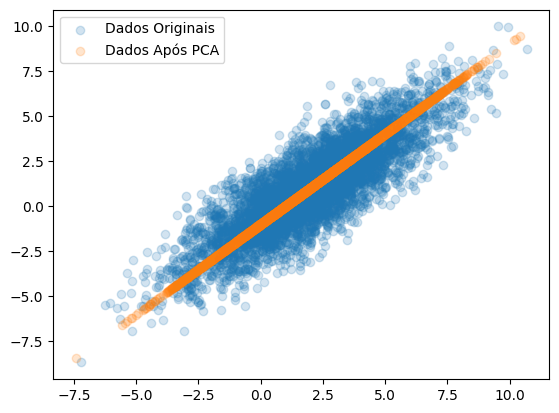


 Os dados foram ajustados em torno de uma dimensão que mais explicava a variância.


In [ ]:
# Complete com seu código
pca_2 = decomposition.PCA(n_components=1)
pca_2.fit(data)

data2 = pca_2.transform(data)
data2_inv = pca_2.inverse_transform(data2)

plt.scatter(data[:,0], data[:,1], alpha=0.2, label='Dados Originais')
plt.scatter(data2_inv[:,0], data2_inv[:,1], alpha=0.2, label='Dados Após PCA')
plt.legend()
plt.show()

print('\n Os dados foram ajustados em torno de uma dimensão que mais explicava a variância.')

# Exercício 2: Medição de rugosidade de superfície.

A Figura 1 mostra uma máquina de medição de coordenadas

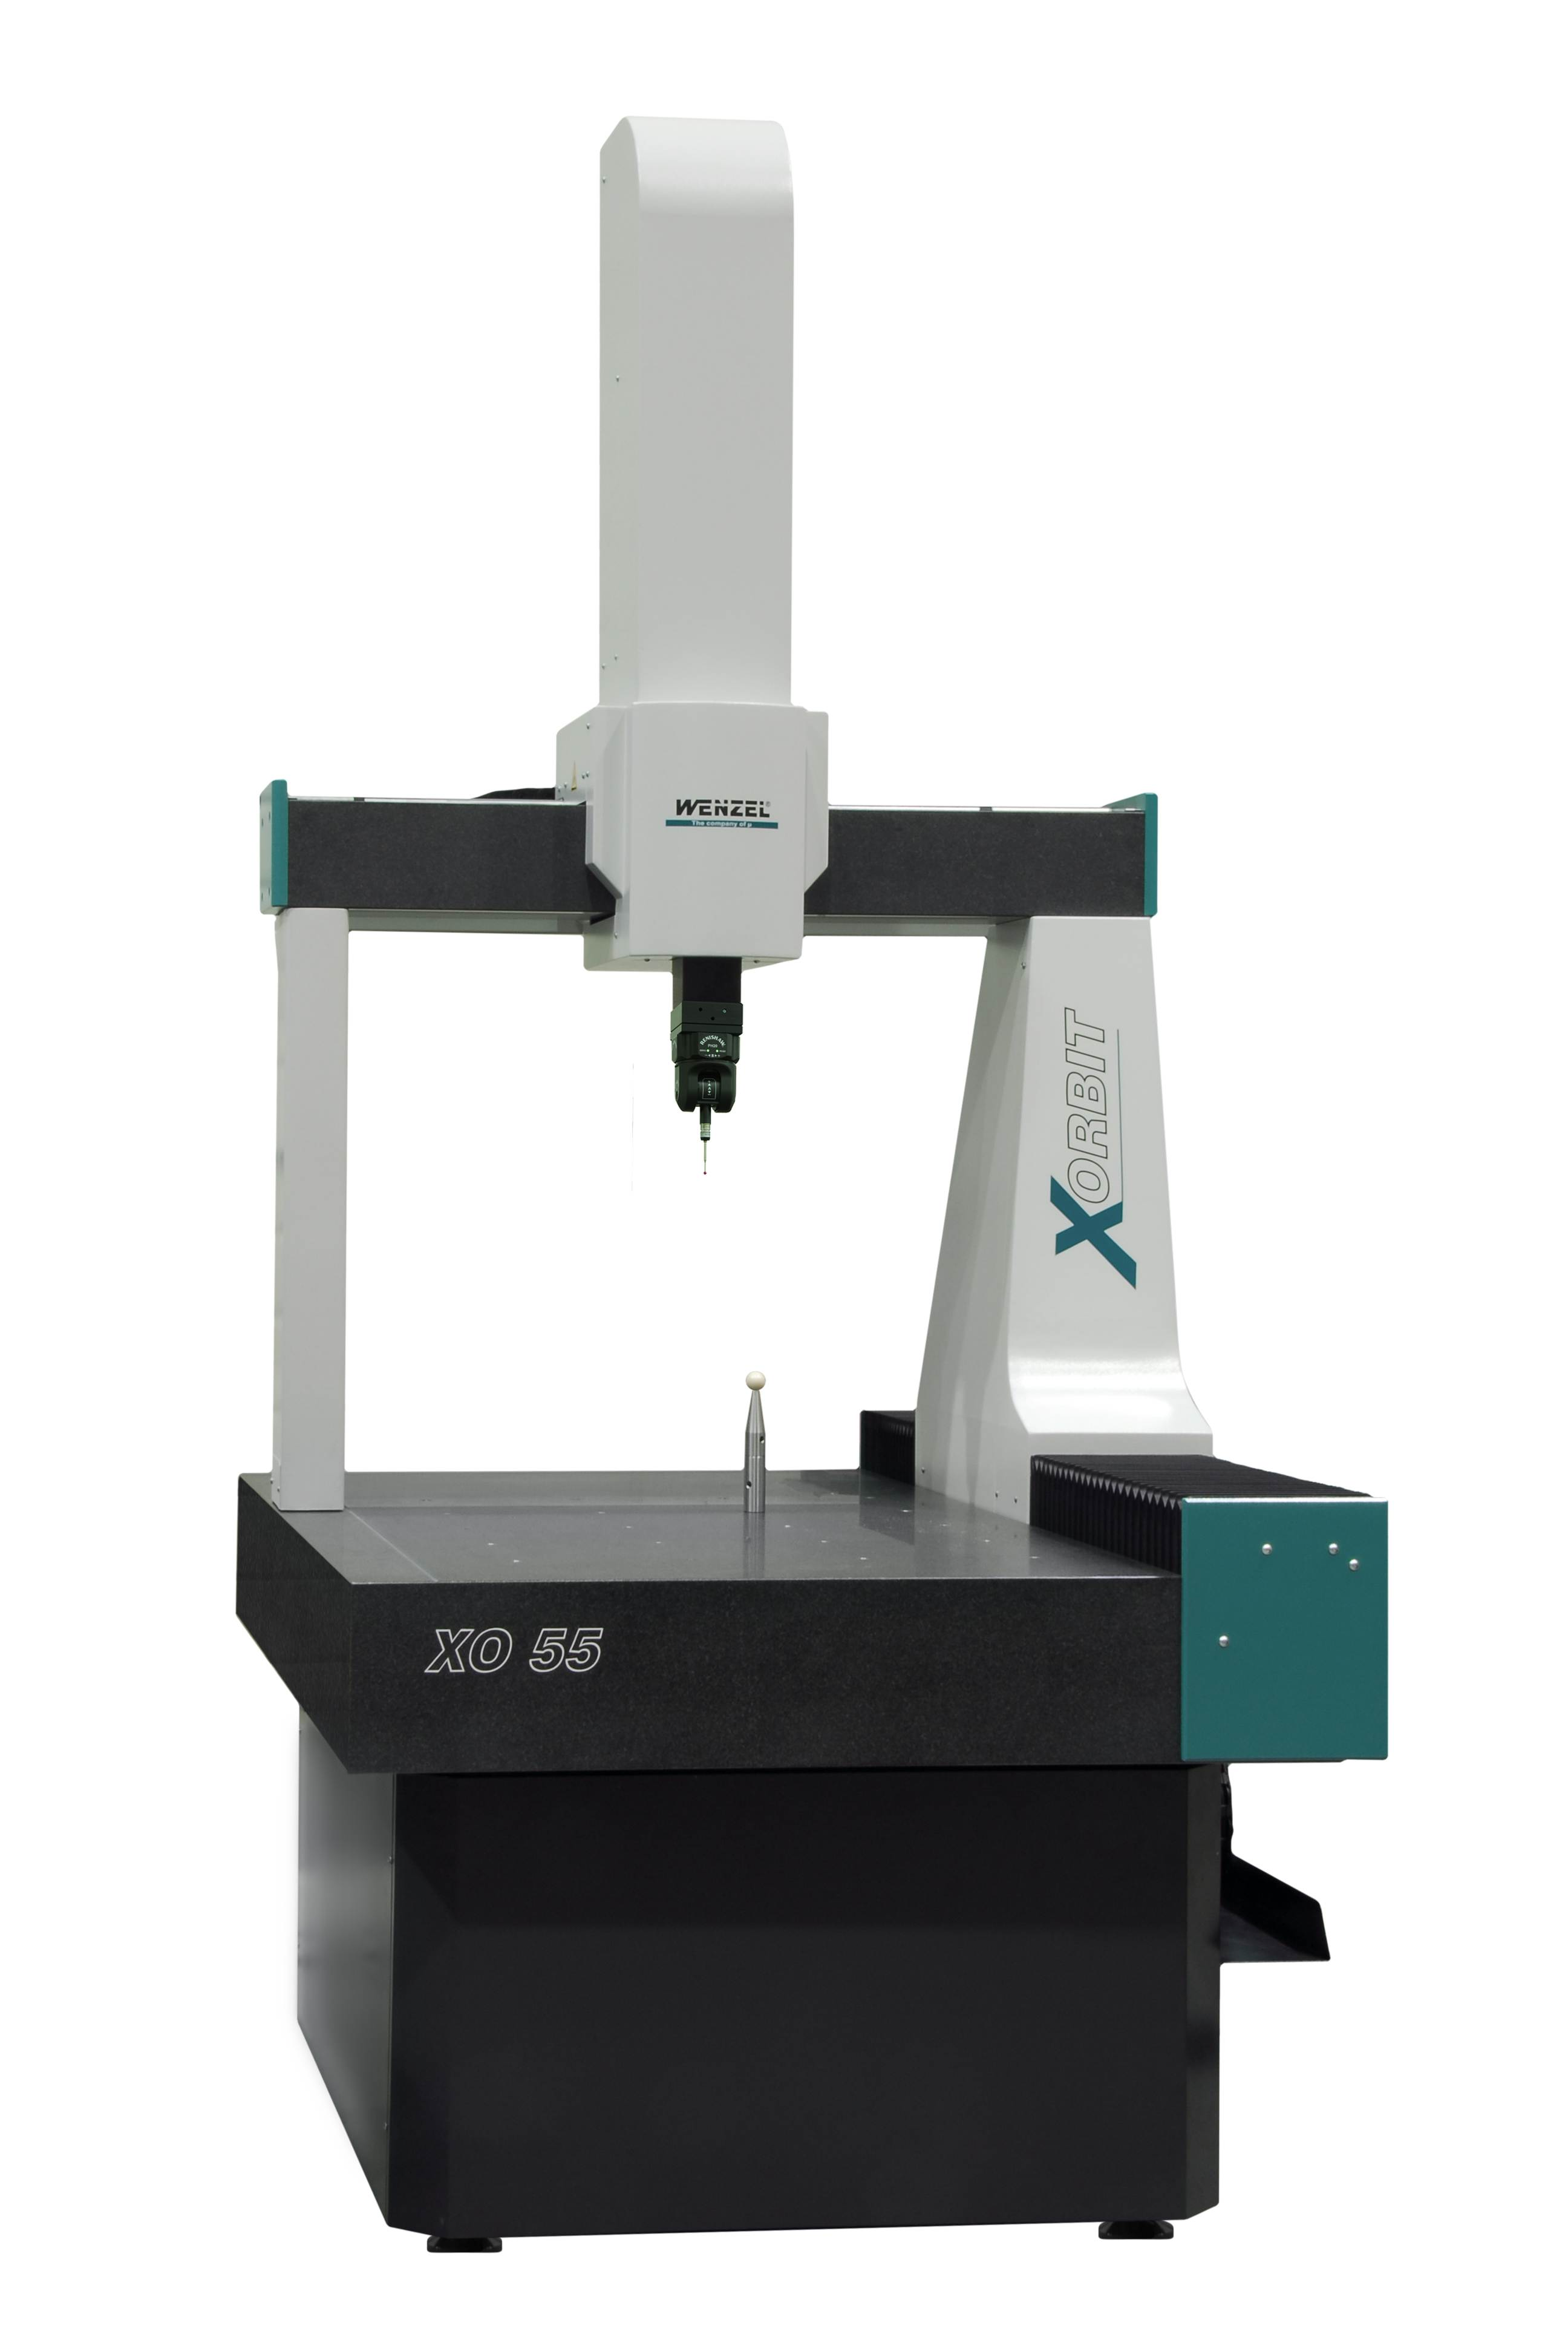
Figura 1. Máquina de medição de coordenadas

Uma tal máquina toca uma superfície com uma sonda e assim coleta coordendadas tridimensionais da mesma.

Uma coleta de dados feita por uma máquina de medição de coordenadas está disponível em ["https://www.lsc.poli.usp.br/hardprobe_01.txt]("https://www.lsc.poli.usp.br/hardprobe_01.txt).

O código abaixo recupera estes pontos e armazena-os em um dataset:

In [ ]:
hardprobe=pd.read_csv(io.TextIOWrapper(request.urlopen("https://www.lsc.poli.usp.br/pece_ai/hardprobe_01.txt")), delimiter=';', skiprows=1, names=["desc", "x", "y", "z"])

O dataset ```hardprobe``` contém as colunas ```x```, ```y``` e ```z``` com as coordendas de cada ponto.
Todas as medidas estão em milímetros.

Os pontos da superfície podem ser vistos na figura abaixo.

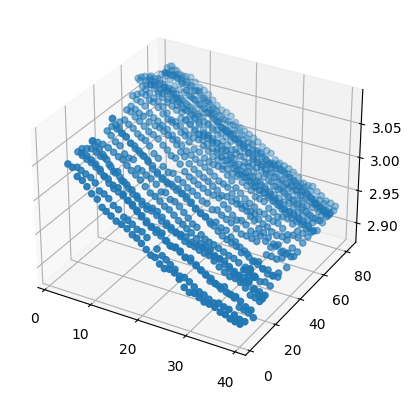

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(hardprobe["x"], hardprobe["y"], hardprobe["z"])

Uma das possíveis medidas de rugosidade de uma superfície é dada pela *raiz quadrada do resíduo médio quadrado*:

\begin{equation}
\sqrt{\frac{1}{n}\sum \left( Y_i - \tilde{Y}_i\right)^2}
\end{equation}

Onde $Y_i$ é um ponto medido na superfície e $\tilde{Y}_i$ é um ponto no plano que melhor aproxima a superfície.

O plano que melhor aproxima a superfície pode ser obtido com decomposição em componentes principais do conjunto de pontos e retendo-se as duas primeiras componentes.

Deste modo, a métrica de rugosidade é a raiz quadrada do *último* autovalor da matriz de covariância dos pontos.

Calcule a rugosidade da superfície medida de acordo com esta métrica usando decomposição em componentes principais (seu resultado deve ficar próximo de 0,006mm).

In [ ]:
# Complete com seu código
import math

pca_rug = decomposition.PCA()
pca_rug.fit(hardprobe[['x', 'y', 'z']])

print(f'Rugosidade calculada: {math.sqrt(pca_rug.explained_variance_[2])} mm')

Rugosidade calculada: 0.006192429859196749 mm


# Análise por agrupamento (*clusters*) e K-means

A análise por agrupamento tem sua origem em um problema de análise de sinais chamado *quantização de vetores*.

O problema surge da observação de que um vetor que represente uma grandeza física no espaço contínuo com precisão arbitrária carrega informação *infinita* (Um problema relacionado: quantos dígitos tem o número $\pi$?).

É desejável assim codificar valores $X \in \mathbb{R}^n$ com uma quantidade *finita* de símbolos $y \in 1 .. m$.

Uma maneira de fazê-lo é escolher um conjunto de $m$ pontos em $Y_i \in \mathbb{R}^n$ e trocar cada ponto $X$ pelo índice $i$ do ponto $Y_i$ mais próximo.

Por exemplo, suponha que pontos no espaço $x, y$ são representados pelos números $1, 2, 3, 4, 5$ de acordo com sua proximidade com os pontos $(0,0)$, $(1,0)$, $(-1,0)$, $(0,1)$ e $(0,-1)$.

Essa separação de um plano em regiões de acordo com sua proximidade a pontos de um conjunto é chamada de *diagrama de Voronoi*:

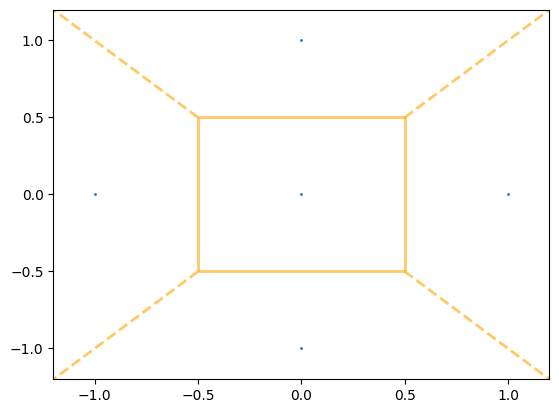

In [ ]:
points = np.array([[0,0],[1,0],[-1,0],[0,1],[0,-1]])
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(points)
fig = voronoi_plot_2d(vor, show_vertices=False, line_colors='orange',

                line_width=2, line_alpha=0.6, point_size=2)

plt.show()

O erro quadrático cometido pela substituição de um valor $X_i$ pelo seu mais próximo $Y_i$ é $\|X_i - Y_i\|^2$.

Suponha uma *partição* $S_i$ de um conjunto original de pontos definida de modo que $X_i \in S_j$ quando o ponto mais próximo de $X_i$ é $Y_j$.

O erro total cometido na aproximação dos valores é então
\begin{equation}
\sum_j \sum _{X_i \in S_i} \left\|X_i -Y_j\right\|^2
\end{equation}

É fácil ver que dada uma partição $S$, os valores de $Y_i$ que *minimizam* este erro são os *valores médios* de $X_i$ dentro de cada partição.

Assim o erro total é dado pela soma da variância total dentro de cada partição.

\begin{equation}
\sum_j \sum _{X_i \in S_i} \left\|X_i -\mu_j\right\|^2 = \sum_j \mbox{var}(S_j)
\end{equation}

O problema de, dada uma quantidade pré-definida de conjuntos $k$ encontrar os $k$ valores médios (e consequentemente as partições) que minimizam este erro é o problema de $k-means$.

Este problema é, em geral, $NP$-difícil, ou seja, o custo de encontrar sua solução ótima cresce exponencialmente com o tamanho do conjunto de pontos.

No entanto, há heurísticas simples que encontram rapidamente soluções satisfatórias.

Segue um exemplo com a biblioteca ```sklearn```.

São criadas 5 nuvens de pontos no plano:

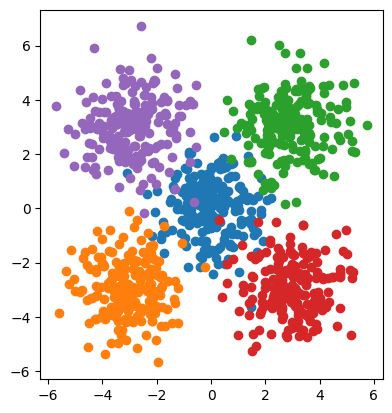

In [ ]:
plt.axes().set_aspect('equal')
p1 = np.random.multivariate_normal([0,0], [[1,0], [0,1]],200)
p2 = np.random.multivariate_normal([-3,-3], [[1,0], [0,1]],200)
p3 = np.random.multivariate_normal([3,3], [[1,0], [0,1]],200)
p4 = np.random.multivariate_normal([3,-3], [[1,0], [0,1]],200)
p5 = np.random.multivariate_normal([-3,3], [[1,0], [0,1]],200)
plt.scatter(p1[:,0], p1[:,1])
plt.scatter(p2[:,0], p2[:,1])
plt.scatter(p3[:,0], p3[:,1])
plt.scatter(p4[:,0], p4[:,1])
plt.scatter(p5[:,0], p5[:,1])

Estas nuvens são combinadas em uma única.
Repare que ainda há uma estrutura subjacente distinguível com 5 agrupamentos.

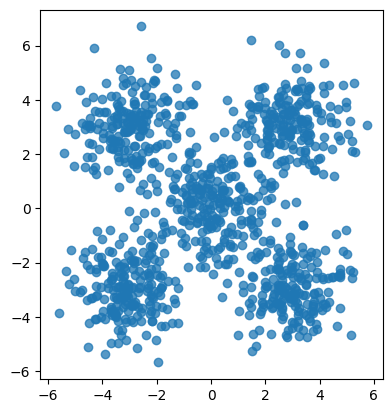

In [ ]:
plt.axes().set_aspect('equal')
todos = np.concatenate([p1,p2,p3,p4,p5])
plt.scatter(todos[:,0], todos[:,1], alpha=0.75)

O objeto ```KMeans``` da biblioteca ```sklearn``` resolve o problema de encontrar uma partição do conjunto de pontos com mínima variância.

O parâmetro ```n_clusters``` do construtor especifica a quantidade de conjuntos.

A heurística subjacente é aleatória.
O parâmetro ```n_init``` especifica quantas vezes o problema deve ser resolvido.
A solução final é a com menor variância total dentro de cada conjunto.
Este valor pode ser obtido no atributo ```inertia_```.
Note que o valor médio deste último se aproxima da variância total de cada uma das nuvens de pontos originais.

Os valores médios de cada cluster estão no atributo ```cluster_centers_``` do objeto.

Uma vez construído o objeto, é possível estimar o índice do cluster ao qual um ponto seria atribuído através do método ```predict```.


## Exercício 3: K-means com valores sintéticos
### a) Agrupando pontos sintéticos

Crie um agrupador K-Means usando o objeto ```KMeans``` da biblioteca ```sklearn```.
Use 5 como valor para ```n_clusters```.
Aplique este agrupador à nuvem de pontos ```todos``` obtida acima.
Plote os diversos grupos de pontos obtidos (sugestão: Você pode repetir a plotagem ```scatter``` acima passando como parâmetro ```c``` o resultado da chamada a ```predict``` do seu agrupador).
Mostre também os centróides de cada cluster.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


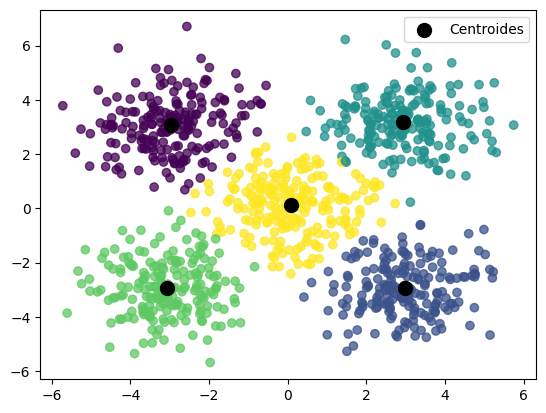

In [ ]:
# Complete com seu código
kmeans = cluster.KMeans(n_clusters=5)

kmeans.fit(todos)

plt.scatter(todos[:,0], todos[:,1], alpha=0.75, c=kmeans.predict(todos))
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], alpha=1, s=100, c='black', label='Centroides')
plt.legend()
plt.show()

### b) Quantidade de conjuntos variável.

Naturalmente, quanto maior o número de conjuntos na partição, menor a variância total, até o limite em que cada conjunto corresponde a um ponto no conjunto original de dados.

Repita o exercício acima passando 20 como ```n_clusters```.
O resultado da clusterização é aleatório. O algoritmo roda um número de vezes e retorna o melhor resultado. Passe 30 no parâmetro ```n_init``` para deixar o seu agrupamento mais robusto.

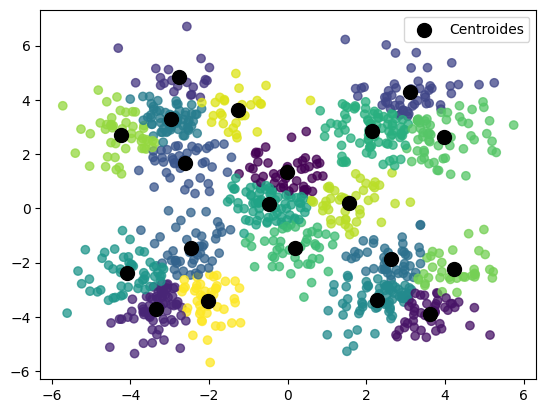

In [ ]:
# Complete com seu código# Complete com seu código
kmeans = cluster.KMeans(n_clusters=20, n_init=30)

kmeans.fit(todos)

plt.scatter(todos[:,0], todos[:,1], alpha=0.75, c=kmeans.predict(todos))
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], alpha=1, s=100, c='black', label='Centroides')
plt.legend()
plt.show()

## c) Curva do "cotovelo"
O problema de se determinar a quantidade apropriada de conjuntos é recorrente na análise por agrupamentos, e não tem solução fácil.

De fato, o próprio enunciado do problema é difícil.
O que significa o "melhor" número de partições?
No problema acima, é evidente que temos 5 partições, mas isso não acontece em geral.

Fala-se em escolher o número máximo de partições a partir do qual "não há ganho significativo" e termos como "curva do cotovelo", mas como se verá, estes são critérios *subjetivos*.
Sim, ao contrário do que talvez você tenha ouvido, *não existe* uma definição matemática de um "ponto de cotovelo".

A dita "curva do cotovelo" é a curva de número de clusters *versus* variância total.
A idéia é que esta curva se pareceria com um braço e este teria um "cotovelo" no ponto ótimo de grupos.

Mostre a curva do cotovelo para os dados acima.
Para isso crie modelos mudando o valor de ```n_clusters``` de 2 a 10.
Para cada agrupamento, armazene o valor da variância intra-cluster média (valor do atributo ```inertia_``` do modelo dividido pela quantidade de pontos).
Use 30 como valor de ```n_init```.

Plote os valores de variância média versus quantidade de clusters.

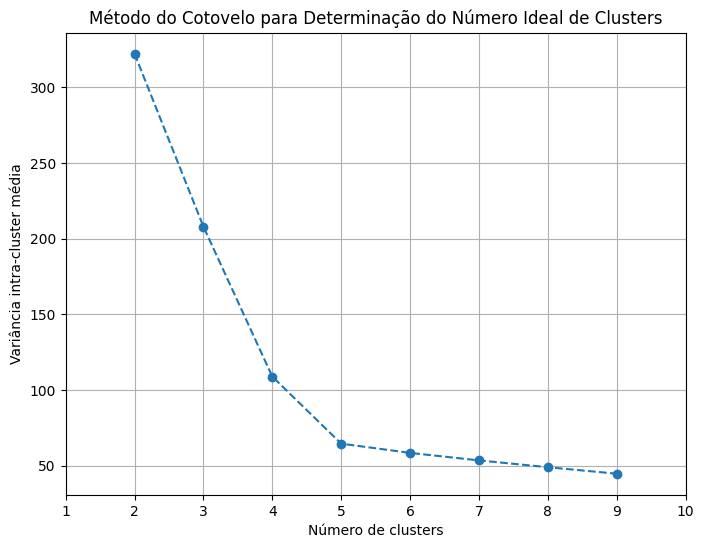

In [ ]:
# Complete com seu código
inertia_list = []
n_cluster_list = []
for i in range(2,10):
  kmeans = cluster.KMeans(n_clusters=i, n_init=30)
  kmeans.fit(todos)
  inertia_list.append(kmeans.inertia_/kmeans.n_init)
  n_cluster_list.append(i)

  # Plotar o método do cotovelo
plt.figure(figsize=(8, 6))
plt.plot(n_cluster_list, inertia_list, marker='o', linestyle='--')
plt.xlabel('Número de clusters')
plt.ylabel('Variância intra-cluster média')
plt.title('Método do Cotovelo para Determinação do Número Ideal de Clusters')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

## d) Curva do "cotovelo"  com clusters ambíguos.

Pode-se argumentar que nos seus resultados há um "cotovelo" em 5 (mas não há outro em 4?).
Mas estes dados foram especialmente preparados para que esta segmentação fosse óbvia.

O que acontece quando ela é menos óbvia?

O código abaixo cria um novo conjunto de pontos chamado ```todos2```.
Nele a distinção entre os clusters não é mais clara.

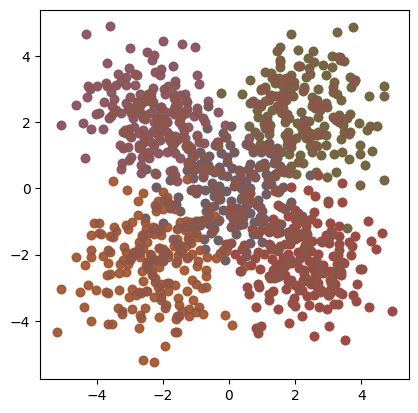

In [ ]:
plt.axes().set_aspect('equal')
p1 = np.random.multivariate_normal([0,0], [[1,0], [0,1]],200)
p2 = np.random.multivariate_normal([-2.2,-2.2], [[1,0], [0,1]],200)
p3 = np.random.multivariate_normal([2.2,2.2], [[1,0], [0,1]],200)
p4 = np.random.multivariate_normal([2.2,-2.2], [[1,0], [0,1]],200)
p5 = np.random.multivariate_normal([-2.2,2.2], [[1,0], [0,1]],200)
plt.scatter(p1[:,0], p1[:,1])
plt.scatter(p2[:,0], p2[:,1])
plt.scatter(p3[:,0], p3[:,1])
plt.scatter(p4[:,0], p4[:,1])
plt.scatter(p5[:,0], p5[:,1])
todos2 = np.concatenate([p1,p2,p3,p4,p5])
plt.scatter(todos2[:,0], todos2[:,1], alpha=0.75)

As nuvens estão se confundindo neste exemplo.
Repita o exercício anterior mostrando a curva do "cotovelo" para estes novos dados.


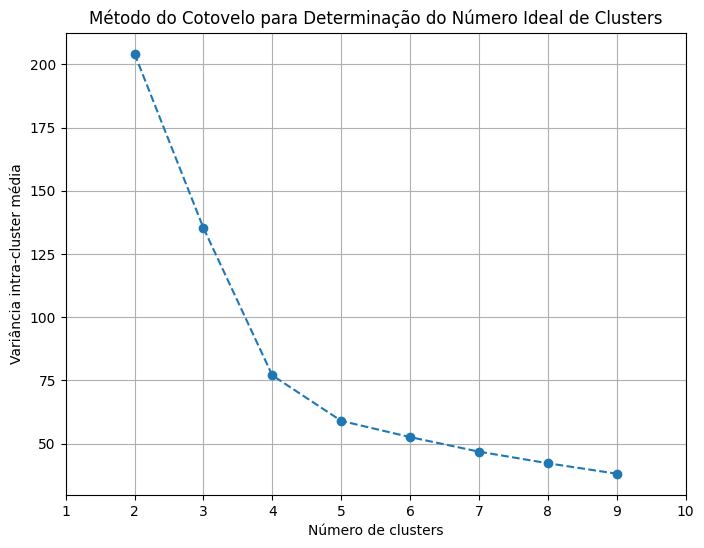

In [ ]:
# Complete com seu código
inertia_list = []
n_cluster_list = []
for i in range(2,10):
  kmeans = cluster.KMeans(n_clusters=i, n_init=30)
  kmeans.fit(todos2)
  inertia_list.append(kmeans.inertia_/kmeans.n_init)
  n_cluster_list.append(i)

plt.figure(figsize=(8, 6))
plt.plot(n_cluster_list, inertia_list, marker='o', linestyle='--')
plt.xlabel('Número de clusters')
plt.ylabel('Variância intra-cluster média')
plt.title('Método do Cotovelo para Determinação do Número Ideal de Clusters')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

E agora, o "cotovelo" está em 4 ou 5?



### e) Índice de silhueta
Um índice de desempenho bem definido é o *índice de silhueta* (*Silhouette Score*).

Para cada ponto $X_i$ do conjunto, define-se $a(i)$ como a *distância média* entre o ponto $X_i$ e os demais pontos que estão no mesmo conjunto que $X_i$.
Define-se $b(i)$ como a *menor* distância entre $X_i$ e outro ponto qualquer que *não* está no mesmo conjunto que $X_i$ (ou seja, o ponto mais próximo que está em outro conjunto) dividido pela quantidade de pontos no conjunto que contém $X_i$.

O índice de silhueta do ponto $X_i$ é dado por:

\begin{equation}
s(i) = \begin{cases}1-a(i)/b(i) & \mbox{ se } a(i)<b(i)\\
0  & \mbox{ se } a(i)=b(i)\\
b(i)/a(i) -1 & \mbox{ se } a(i)>b(i) \end{cases}
\end{equation}

Além disso, $s(i)=0$ para pontos que pertençam a conjuntos unitários.
Mostra-se que pela definição, $-1 \leq s(i) \leq 1$.

Ademais, quanto *maior* o índice de silhueta de um determinado ponto, mais próximo ele está dos pontos do seu conjunto e mais distante dos demais.

O índice de silhueta médio pode ser calculado para diferentes partições e assim pode-se escolher a quantidade de conjuntos que maximiza este índice.

A função ```metrics.silhouette_score(pontos, classificacao)``` calcula o índice de silhueta médio para o conjunto na matriz ```pontos``` agrupado de acordo com os índices em ```classificacao```.

Mostre o gráfico do índice de silhueta médio obtido com os dados acima.

(Lembre-se que a classificação de um conjunto de pontos pode ser obtida pelo método ```predict```).

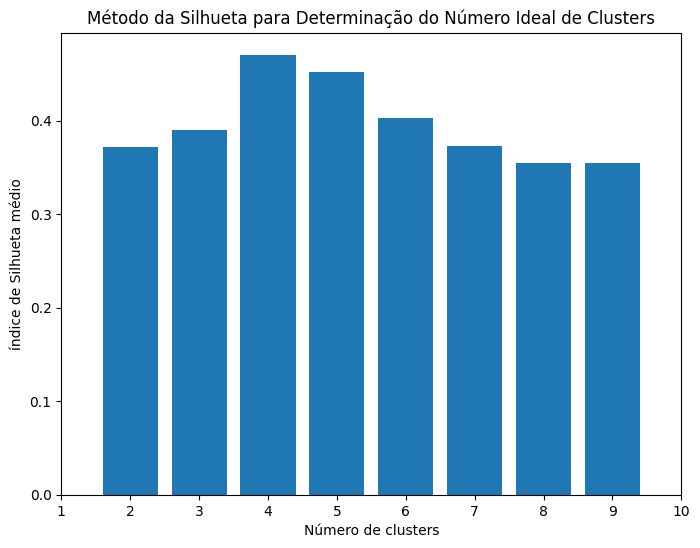

In [ ]:
# Complete com seu código
silhouette_scores = []
n_cluster_list = []

for i in range(2, 10):
    kmeans = cluster.KMeans(n_clusters=i, n_init=30)
    cluster_labels = kmeans.fit_predict(todos2)
    n_cluster_list.append(i)

    silhouette_avg = metrics.silhouette_score(todos2, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 6))
plt.bar(n_cluster_list, silhouette_scores)
plt.xlabel('Número de clusters')
plt.ylabel('índice de Silhueta médio')
plt.title('Método da Silhueta para Determinação do Número Ideal de Clusters')
plt.xticks(range(1, 11))
plt.show()

Note que a ambiguidade entre 4 e 5 não é completamente resolvida!

## Exercício 4: Redução de espaço de cores

Uma tela de computador *rasterizada* mantém em memória a imagem exibida na forma de um *mapa de bits*.
Este mapa de bits é uma estrutura de memória similar a uma matriz, na qual a organização em linhas e colunas é linearizada.
As linhas são armazenadas uma após a outra.
Cada *pixel* da imagem é representado por um conjunto de bits.

Por exemplo, no formato RGB888, cada pixel é representado por 24 bits.
Neste formato, os 8 primeiros bits correspondem à intensidade de luz vermelha do *pixel*, os 8 seguintes correspondem à intensidade verde e os 8 finais correspondem à intensidade azul.
Este formato permite representar o impressionante número de 16,7 milhões de cores simultaneamente.

Eis um exemplo de uma imagem que usa todo o espaço de cores RGB888:

In [ ]:
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/f/f2/Ara_macao%2C_Ara_ararauna_and_Ara_militaris.jpg/640px-Ara_macao%2C_Ara_ararauna_and_Ara_militaris.jpg -O arara.jpg

--2024-07-10 02:22:12--  https://upload.wikimedia.org/wikipedia/commons/thumb/f/f2/Ara_macao%2C_Ara_ararauna_and_Ara_militaris.jpg/640px-Ara_macao%2C_Ara_ararauna_and_Ara_militaris.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 132390 (129K) [image/jpeg]
Saving to: ‘arara.jpg’

arara.jpg           100%[===================>] 129.29K  --.-KB/s    in 0.1s    

2024-07-10 02:22:13 (963 KB/s) - ‘arara.jpg’ saved [132390/132390]



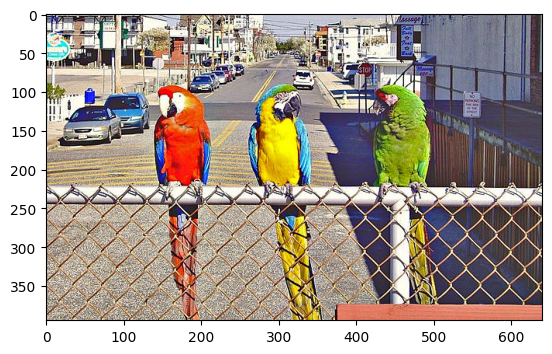

In [ ]:
imagem = mpimg.imread('arara.jpg')
plt.imshow(imagem)


Em dispositivos com memória limitada, faz-se frequentemente uso de uma *paleta de cores*.
Neste caso, a paleta é um subconjunto do total de cores que podem ser exibidas simultaneamente.

A vantagem deste método é que cada pixel pode usar uma quantidade significativamente menor de memória.
Por exemplo, uma paleta de 64 cores precisa de apenas 6 bits por pixel, um ganho de 4x sobre o formato RGB888.
Do mesmo modo, uma paleta de 16 cores precisa de apenas 4 bits por pixel.

O processo de seleção da paleta ótima para uma imagem é complexo.

Podemos fazê-lo por K-means.



### a) Linearização dos dados de entrada

O objeto ```imagem``` é uma matriz com 3 eixos, respectivamente y, x e cores.
Verifique o seu formato pelo atributo ```shape```.

Podemos considerar os pixels como uma coleção de pontos em um espaço tridimensional.
Crie um novo objeto ```dados_imagem``` com esta coleção.
Este objeto deve ter 3 colunas, uma para cada componente RGB, e tantas linhas quantos pixels na imagem original.

In [ ]:
# Complete com seu código
print(imagem.shape)
n_linhas, n_colunas, _ = imagem.shape
dados_imagem = imagem.reshape(n_linhas * n_colunas, 3)
print(dados_imagem.shape)

(395, 640, 3)
(252800, 3)


### b) Criação de uma paleta com 64 cores

Crie um classificador K-Means para criar uma paleta com 64 cores a partir dos dados da imagem.

Use 64 como quantidade de cores e 30 como ```n_init```.

A paleta deve ser obtida a partir dos centróides de cada cluster.
Note no entanto que o objeto de centróides é uma matriz de ponto flutuante. Ela deve ser convertida para inteiros.
Atribua sua paleta à variável ```paleta64```.

In [ ]:
# Complete com seu código
kmeans = cluster.KMeans(n_clusters=64, n_init=30)
cluster_labels = kmeans.fit(dados_imagem)
paleta64 = kmeans.cluster_centers_.astype(int)

array([[102.13944461, 103.6312332 , 122.66378023],
       [214.97524889, 204.8130531 , 191.24018252],
       [ 40.55257543,  37.95458702,  72.81956721],
       [165.72888589, 138.8712938 , 109.96383648],
       [248.57970343, 244.44937442, 229.73911029],
       [244.51727192,  33.55314438,   8.45128432],
       [232.34205128, 198.17948718,   7.01794872],
       [ 11.28963479,   4.34853283,   6.09499683],
       [152.0607514 , 113.80255795,  10.29336531],
       [189.64490142, 175.76669493, 159.01420394],
       [232.092142  , 139.01076984, 114.06940566],
       [ 82.11617807, 103.28121607,  11.16178067],
       [115.75941677, 101.64823815,  90.57756177],
       [ 80.5181686 ,  62.65643169,  57.29396802],
       [ 81.70375723, 191.64017341, 227.45953757],
       [ 71.4157741 ,  92.969815  , 156.27458617],
       [150.20429104, 179.11473881,  35.59095149],
       [240.46289753, 224.22791519, 142.83922261],
       [ 55.83781741,  51.44452842,  90.82542322],
       [237.61805714, 215.58742

### c) Mostrando a nova imagem

O objeto ```paleta64``` contém 64 cores no espaço RGB8888.
Estas cores correspondem a centróides de clusters construídos na etapa anterior.
Cada pixel da imagem original pode atribuido a um destes 64 clusters, de modo que são necessários apenas 6 bits para representá-lo.
Gostaríamos no entanto de conhecer a nova imagem!

Primeiro crie um novo objeto chamado ```dados_imagem_64``` com os índices de cor de cada pixel usando o método ```predict``` do seu modelo aplicado ao ```dados_imagem```.
Imprima o seu atributo ```dtype```, o seu valor máximo e o seu valor mínimo, mostrando que ele contém inteiros de 0 a 63.

Finalmente, reconstrua e mostre a imagem.
Sugestão: Observe que ```dados_imagem_64``` contém índices válidos em ```paleta64```.
Assim ```paleta64[dados_imagem_64]``` é um vetor de pixels no espaço original RGB888.
É necessário redimensioná-lo para as dimensões da imagem original de modo a mostrar a imagem com plt.imshow()

int32
0
63


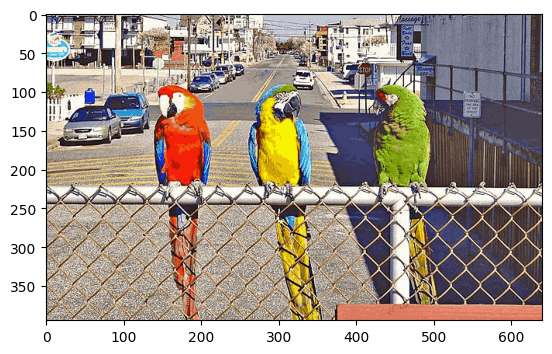

In [ ]:
# Complete com seu código
dados_imagem_64 = kmeans.predict(dados_imagem)
print(dados_imagem_64.dtype)
print(dados_imagem_64.min())
print(dados_imagem_64.max())
dados_imagem_final = paleta64[dados_imagem_64]
dados_imagem_final = dados_imagem_final.reshape(n_linhas, n_colunas, 3)
plt.imshow(dados_imagem_final)

### d) Avaliando uma paleta de apenas 16 cores

Repita todo o processo, mas agora com apenas 16 cores

int32
0
15


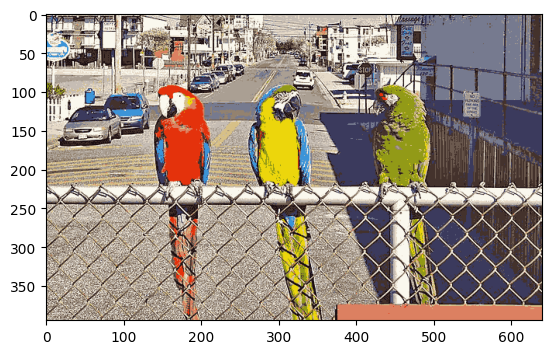

In [ ]:
# Complete com seu código
kmeans = cluster.KMeans(n_clusters=16, n_init=30)
cluster_labels = kmeans.fit(dados_imagem)
paleta16 = kmeans.cluster_centers_.astype(int)
dados_imagem_16 = kmeans.predict(dados_imagem)
print(dados_imagem_16.dtype)
print(dados_imagem_16.min())
print(dados_imagem_16.max())
dados_imagem_final = paleta16[dados_imagem_16]
dados_imagem_final = dados_imagem_final.reshape(n_linhas, n_colunas, 3)
plt.imshow(dados_imagem_final)

## Exercício 5: Agrupando símbolos via PCA e K-Means (Nota Extra!)

*Observação*: Esta é uma *péssima* maneira de se fazer reconhecimento ótico de caracteres.
De fato, se você fez o corrrespondente exercício de SVM, sabe que aquele já é um excelente classificador.
As hipóteses de linearidade subjacentes ao PCA e K-Means têm aplicabilidade limitada aqui.
De todo modo, vamos usar estes algoritmos nesta aplicação um tanto inadequada para explorar seus limites.

Vamos voltar a trabalhar com os dados do [Optical Recognition of Handwritten Digits Data Set](http://archive.ics.uci.edu/ml/datasets/optical+recognition+of+handwritten+digits) que contém imagens de dígitos de 0 a 9 manuscritos por voluntários. (vide exercício 6 de SVM).

O código abaixo recupera os dados, já divididos em treinamento e validação

In [ ]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra -O optdigits.tra
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes -O optdigits.tes

--2024-07-10 02:48:24--  http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘optdigits.tra’

optdigits.tra           [   <=>              ] 550.43K   836KB/s    in 0.7s    

2024-07-10 02:48:25 (836 KB/s) - ‘optdigits.tra’ saved [563639]

--2024-07-10 02:48:25--  http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘optdigits.tes’

optdigits.tes           [    <=>             ] 258.51K   331KB/s    in 0.8s    

2024-07-10 02:48:26 (331 KB/s) - ‘optdigits.tes’ save

In [ ]:
X_train = pd.read_csv('optdigits.tra', header=None)
y_train = X_train[64]
X_train = X_train.drop(X_train.columns[64], axis=1)

In [ ]:
X_test = pd.read_csv('optdigits.tes', header=None)
y_test = X_test[64]
X_test = X_test.drop(X_test.columns[64], axis=1)

Como visto, estas imagens são vetores com 64 componentes, uma dimensão excessiva para a quantidade de informação representada:

In [ ]:
plt.imshow(X_train.values[2].reshape(8,8))
plt.show()

### a) Reduzindo a dimensão do conjunto de dados.

64 coeficientes é um número exagerado para imagens de tão baixa qualidade.

Vamos usar PCA sobre os dados de treinamento para criar uma base vetorial mais eficiente para estas imagens.

Use a biblioteca ```sklearn``` para criar uma decomposição em componentes principais da base de treinamento (os valores armazenados em ```X_train```) com dimensão 16 (1/4 da dimensão original).

Cada linha do atributo ```components_``` é o que chamamos de "auto-imagem". Note que ela tem exatamente 64 coeficientes.
Mostre os 16 coeficientes na forma de imagem (use o exemplo acima).
Estas imagens provavelmente não farão muito sentido para você.

Agora mostre as 10 primeiras imagens do conjunto ```X_test```.
Projete cada uma destas imagens no espaço reduzido de PCA e transforme-as de volta ao espaço original (use os métodos ```transform``` e ```inverse_transform```).

Compare visualmente as imagens originais com as recuperadas da transformação.

In [ ]:
# Complete com seu código

### b) Estimando a quantidade de símbolos distintos na amostra

Vamos agora *ignorar completamente* os rótulos pré-definidos em ```y_train``` e tentar estimar a quantidade de símbolos distintos somente pelos dados do PCA e métricas de desempenho de k-means.

Para tanto, gere classificadores k-means a partir dos dados obtidos no item a).

Passe como parâmetros ```init='k-means++'```, ```n_init=60``` e como ```n_clusters```, teste valores de 2 a 20.

Plote a "curva de cotovelo" e os índices de silhueta.

Qual é o valor do *primeiro* pico da curva de índices de silhueta?
E do maior?

In [ ]:
# Complete com seu código

### c) Construindo um classificador com k-means.

A ordem dos grupos obtida pelo classificador é arbitrária e não tem qualquer relação com os rótulos em ```y_train```.

É desejável no entanto fazer um dicionário entre os índices obtidos pelo classificador e os rótulos em ```y_train```.

Para tanto, construa um classificador usando os dados de pca com a quantidade de grupos correspondetes ao *pico* do índice de silhueta médio e os demais parâmetros sugeridos no item b.

Encontre para cada subdivisão do conjunto ```X_train``` (projetado no espaço de componentes principais) qual é a *moda* do valor correspondente a ```y_train```.
Use este valor para criar um dicionário que traduz um índice obtido pelo classificador em um rótulo em ```y_train```.

Mostre os centróides do classificador assim obtido na forma de imagens e os correspondentes rótulos em ```y_train```.

Plote a matriz de confusão da classificação dos dados em ```X_test``` comparados com os valores reais ```y_test```. Lembre-se de traduzir os índices de grupos em rótulos usando o dicionário que você criou!

In [ ]:
# Complete com seu código